## Python statistics essential training - 05_05_logistic

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# fix error in some versions of statsmodels
import scipy
if not hasattr(scipy.stats,'chisqprob'):
    scipy.stats.chisqprob = lambda chisq, df: scipy.stats.chi2.sf(chisq, df)

In [12]:
#import categorical data
smoking = pd.read_csv("whickham.csv")

In [13]:
# downsample to remove ages over 64, improve prediction bc none of these are alive after 20 years
smoking = smoking[smoking.age < 65]

In [14]:
# function to fit the data
color = np.where(smoking.smoker == 'No','skyblue','coral')
jitter = 0.05*(np.random.rand(len(smoking)) - 0.5)
def plotfit(fit):
    pp.scatter(smoking.age,smoking.outcome + jitter,c=color,linewidth=0.2,edgecolor='k',alpha=0.5)
    pp.scatter(smoking.age,fit.predict(smoking),c=color,linewidth=0.2,edgecolor='gray',marker='d')

In [15]:
# to find ols, convert alive outcome to int
smoking['outcome'] = 1*(smoking['outcome'] == 'Alive')
# make a ols fit with parameters smoker and age
ols_group_age = smf.ols('outcome ~ smoker + age',data=smoking).fit()

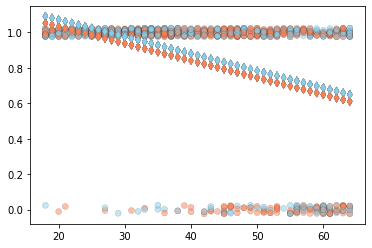

In [16]:
#plot the ols, orange for smokers, blue for nonsmokers, jitter included
# smoker intercept is negative
plotfit(ols_group_age)

In [17]:
#get the intercept values
ols_group_age.params

Intercept        1.264665
smoker[T.Yes]   -0.038738
age             -0.009615
dtype: float64

In [18]:
# look at anova
#the association is not particularly strong w f-stat of 8
sm.stats.anova_lm(ols_group_age)

,df,sum_sq,mean_sq,F,PR(>F)
smoker,1.0,0.899981,0.899981,8.181417,4.314608e-03
age,1.0,17.713821,17.713821,161.030213,1.806638e-34
Residual,1068.0,117.483303,0.110003,NaN,NaN


In [19]:
# confidence int confirms this
ols_group_age.conf_int()

,0,1
Intercept,1.198828,1.330503
smoker[T.Yes],-0.078622,0.001146
age,-0.011102,-0.008129


In [20]:
# there are some values larger than 1 in the plot above
# use logistic regression to fit linear to bound between 0 and 1
logit_smoker_age = smf.logit('outcome ~ smoker + age',data=smoking).fit()

Optimization terminated successfully.
         Current function value: 0.346766
         Iterations 7


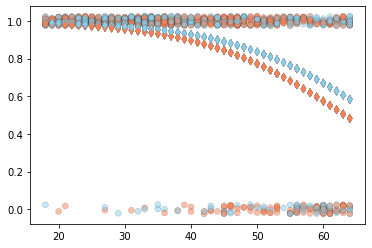

In [21]:
plotfit(logit_smoker_age)

In [22]:
#logistic fit
logit_smoker_age.llf

-371.38650786619064

In [18]:
# parameters association with smoking still week
logit_smoker_age.params

Intercept        6.250847
smoker[T.Yes]   -0.408103
age             -0.092403
dtype: float64

In [23]:
logit_smoker_age.conf_int()

,0,1
Intercept,5.331126,7.170568
smoker[T.Yes],-0.777754,-0.038451
age,-0.109478,-0.075327


In [25]:
#logistic model depends on parameters
logit_smoker_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                 1071
Model:                          Logit   Df Residuals:                     1068
Method:                           MLE   Df Model:                            2
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.1776
Time:                        16:25:42   Log-Likelihood:                -371.39
converged:                       True   LL-Null:                       -451.59
Covariance Type:            nonrobust   LLR p-value:                 1.469e-35
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.2508      0.469     13.321      0.000       5.331       7.171
smoker[T.Yes]    -0.4081      0.189     -2.164      0.030      -0.778      -0.038
age              -0.0924      0.009    -10.606      0.000      -0.109      -0.075
=================================================================================
"""